# Лабораторная по pandas, numpy, scipy.stats, matplotlib, seaborn


### Дедлайн: 26 декабря 23:59

Работа принимается один раз, как только вы отправили ее своему семинаристу по любому канаду связи.

Плагиат будет караться полной отменой баллов за лабораторную.


 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)
 - [Официальная документация scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

# Часть 1 `Numpy`, `Matplotlib`, `scipy.stats`

In [4]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

## 1. Данные

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1 (3 балла)
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [2]:
def coin(size=None):
  return np.random.choice([0, 1], size=size)

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [5]:
coin(size=10)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

**Решение**

In [6]:
def uniform(size=1, precision=30):
    if isinstance(size, int):
        size = (size,)
    binary_matrix = coin(size + (precision,))
    binary_weights = 0.5 ** np.arange(1, precision + 1)
    return (binary_matrix @ binary_weights).reshape(size)

print(uniform(size=(2, 3), precision=100))

[[0.24777878 0.27764478 0.75032847]
 [0.01991135 0.56446577 0.13957631]]


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

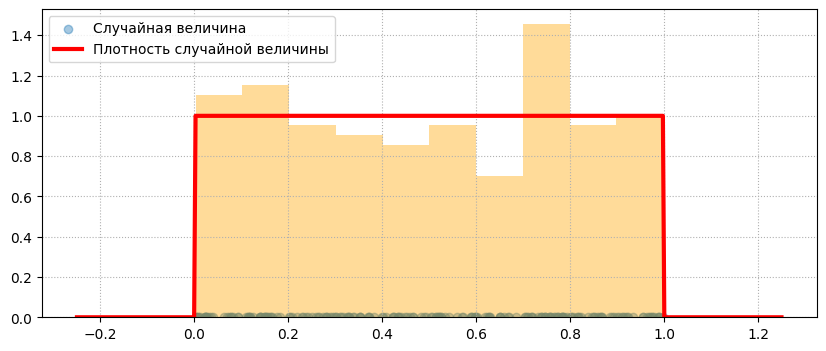

In [ ]:
size = 200
grid = np.linspace(-0.25, 1.25, 500)
sample = uniform(size, precision = 50)

# Отрисовка графика
plt.figure(figsize = (10, 4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample,
    np.zeros(size),
    alpha = 0.4,
    label = "Случайная величина"
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample,
    bins = 10,
    density = True,
    alpha = 0.4,
    color = "orange"
)

# рисуем график плотности
plt.plot(
    grid,
    sps.uniform.pdf(grid),
    color = 'red',
    linewidth = 3,
    label = "Плотность случайной величины"
)

plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

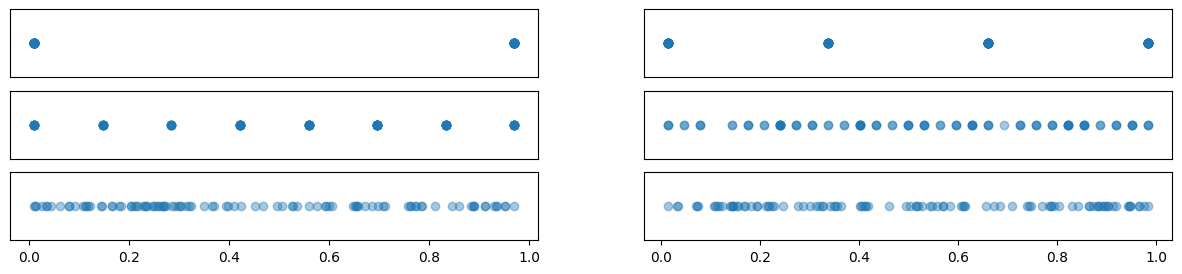

In [ ]:
size = 100

plt.figure(figsize = (15, 3))

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size, precision),
        np.zeros(size),
        alpha = 0.4
    )
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

**Вывод:**

Гистограммы и плотности подтверждают теоретическую базу равномерного распределения. При малых значениях precision (например,
precision=3), распределение становится дискретным с явными ступенями. С увеличением значения precision распределение становится более гладким, приближаясь к истинному равномерному распределению.
***

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [7]:
def normal(size=1, loc=0, scale=1, precision=30):
    if isinstance(size, int):
        size = (size,)
    u1, u2 = uniform(size=size, precision=precision), uniform(size=size, precision=precision)
    z1 = np.sqrt(-2.0 * np.log(u1)) * np.cos(2.0 * np.pi * u2)
    return loc + scale * z1

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

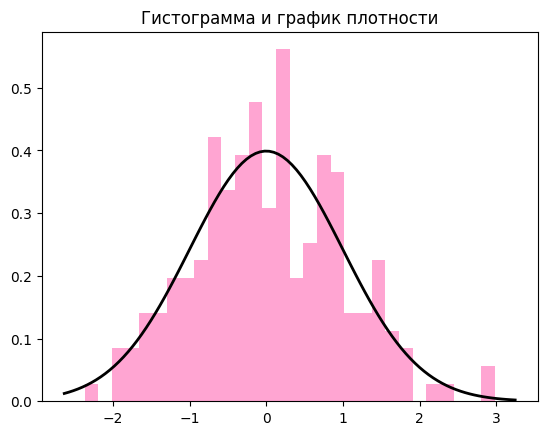

In [8]:
samples = normal(size=200)

plt.hist(samples, bins=30, density=True, alpha=0.6, color='hotpink')

min_x, max_x = plt.xlim()
x = np.linspace(min_x, max_x, 100)
p = sps.norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)

title = "Гистограмма и график плотности"
plt.title(title)

plt.show()

Решение основывается на **методе обратного преобразования**

Поскольку ф-ия экспоненциального распределения $F(x) = (1 - e^{-\lambda x}) \cdot I(x > 0)$ является строго монотонной и непрерывной на $R$, то у неё есть обратная ф-ия $F^{-1}: [0, 1] \rightarrow R$.
Таким образом, если $U_1, \ldots, U_n$ - выборка из равномерного распределения, то $X_1, \ldots, X_n,$ где $X_i = F^{-1}(U_i),$ - выборка из экспоненциального распределения

$F^{-1}(x) = -\dfrac{1}{\lambda}{ }\ln(1 - x)$

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [11]:
def expon(size=1, lambd=1, precision=30):
    uniform_sample = uniform(size=size)
    exponential_sample = -np.log(1 - uniform_sample) / lambd
    return np.round(exponential_sample, precision)

print(expon(10))

[2.51725634 2.37727262 2.55411164 0.17683171 1.20359316 1.26601233
 2.97553647 1.98593119 0.15580353 0.28133991]


Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

<ipython-input-14-1c428a43543c>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x, y, 'g-', label='Exp(1)', color="black")


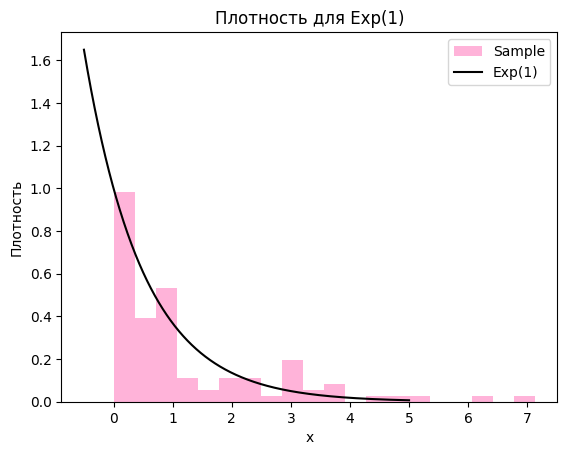

In [14]:
exp_sample = expon(size=100)

x = np.linspace(-0.5, 5, 1000)
y = np.exp(-x)

plt.hist(exp_sample, bins=20, density=True, alpha=0.5, label='Sample', color="hotpink")
plt.plot(x, y, 'g-', label='Exp(1)', color="black")
plt.title('Плотность для Exp(1)')
plt.xlabel('x')
plt.ylabel('Плотность')
plt.legend()
plt.show()

**Вывод по задаче:**

Чем больше выборка, тем точнее гистограмма приближается к графику плотности

### Задача 2  (3 балла)
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива.

*Авторское решение занимает одну строчку.*

In [ ]:
def matrix_multiplication(A, B):
  return np.sum(A[:, :, np.newaxis] * B[np.newaxis, :, :], axis=1)

Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [ ]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

6.616929226765933e-14

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [ ]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [ ]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B)

print(10)

CPU times: user 62.1 ms, sys: 38.4 ms, total: 101 ms
Wall time: 99.2 ms
CPU times: user 6.18 ms, sys: 0 ns, total: 6.18 ms
Wall time: 3.14 ms
CPU times: user 3.39 ms, sys: 1.05 ms, total: 4.44 ms
Wall time: 2.23 ms
CPU times: user 20.3 s, sys: 92.5 ms, total: 20.4 s
Wall time: 20.5 s
CPU times: user 9.34 ms, sys: 8 µs, total: 9.35 ms
Wall time: 9.22 ms
10


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [ ]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.

    '''

    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)

    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))

    C = np.sum(A[:, :, np.newaxis] * B[np.newaxis, :, :], axis=1)

    return C

### Задача 3  (4 балла)

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа.

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации.
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [ ]:
def brownian_motion(sigma, T, num_intervals, dim, num_particles):
    delta_t = T / num_intervals

    increments = np.random.normal(
        loc=0,
        scale=np.sqrt(sigma**2 * delta_t),
        size=(num_particles, dim, num_intervals)
    )

    positions = np.cumsum(increments, axis=2)

    positions = np.concatenate(
        [np.zeros((num_particles, dim, 1)), positions], axis=2
    )

    return positions

**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

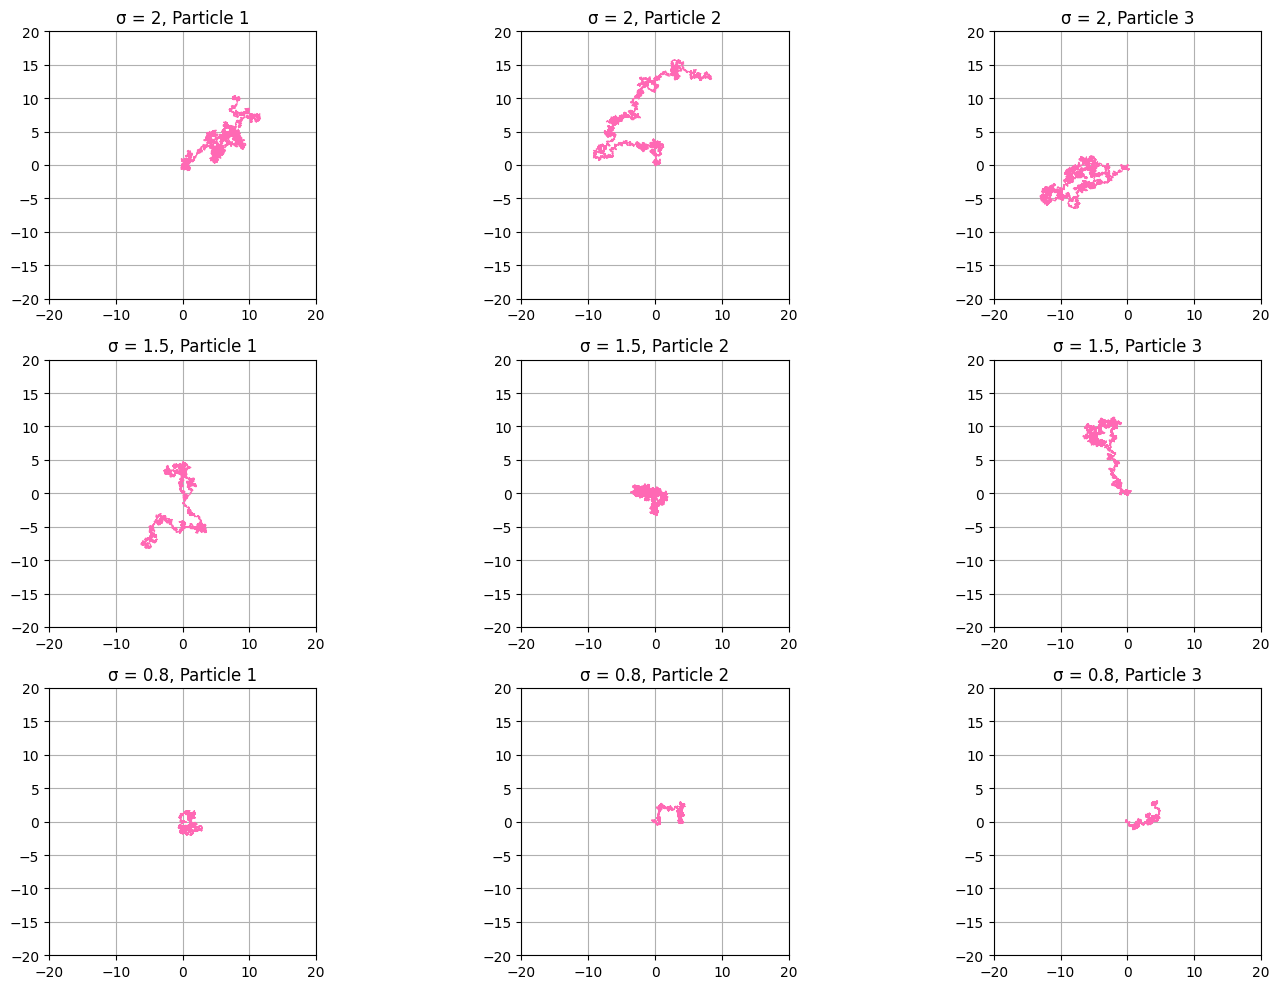

In [ ]:
from builtins import max


def visualize_2d_brownian_motion(sigma_values, T, num_intervals, num_particles):
    delta_t = T / num_intervals

    fig, axes = plt.subplots(len(sigma_values), num_particles, figsize=(15, 10))

    for i, sigma in enumerate(sigma_values):
        trajectories = brownian_motion(sigma, T, num_intervals, dim=2, num_particles=num_particles)

        for j in range(num_particles):
            ax = axes[i, j] if len(sigma_values) > 1 else axes[j]
            ax.plot(trajectories[j, 0, :], trajectories[j, 1, :], lw=0.8, color="hotpink")
            ax.set_title(f"σ = {sigma}, Particle {j+1}")
            ax.set_xlim(-T * max(sigma_values), T * max(sigma_values))
            ax.set_ylim(-T * max(sigma_values), T * max(sigma_values))
            ax.set_aspect('equal')
            ax.grid(True)

    plt.tight_layout()
    plt.show()


visualize_2d_brownian_motion([2, 1.5, 0.8], 10, 10000, 3)

Как вид траектории зависит от $\sigma$?

Да, зависит. Чем больше 𝜎, тем больше разброс относительно центра координат.

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

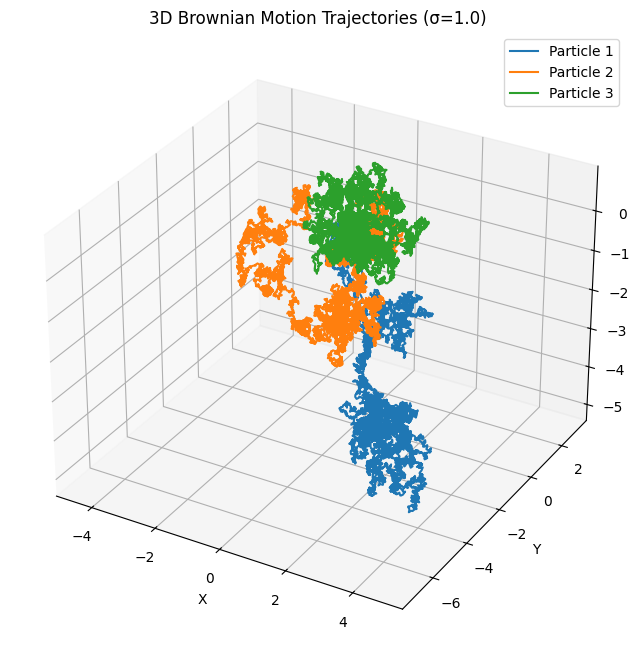

In [ ]:
def plot_3d_brownian_motion(sigma, T, num_intervals, num_particles):
    trajectories = brownian_motion(sigma, T, num_intervals, dim=3, num_particles=num_particles)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i in range(num_particles):
        ax.plot(
            trajectories[i, 0, :],
            trajectories[i, 1, :],
            trajectories[i, 2, :],
            label=f"Particle {i+1}"
        )

    ax.set_title(f"3D Brownian Motion Trajectories (σ={sigma})")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.show()

sigma = 1.0
T = 10.0
num_intervals = 10000
num_particles = 3

plot_3d_brownian_motion(sigma, T, num_intervals, num_particles)

**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

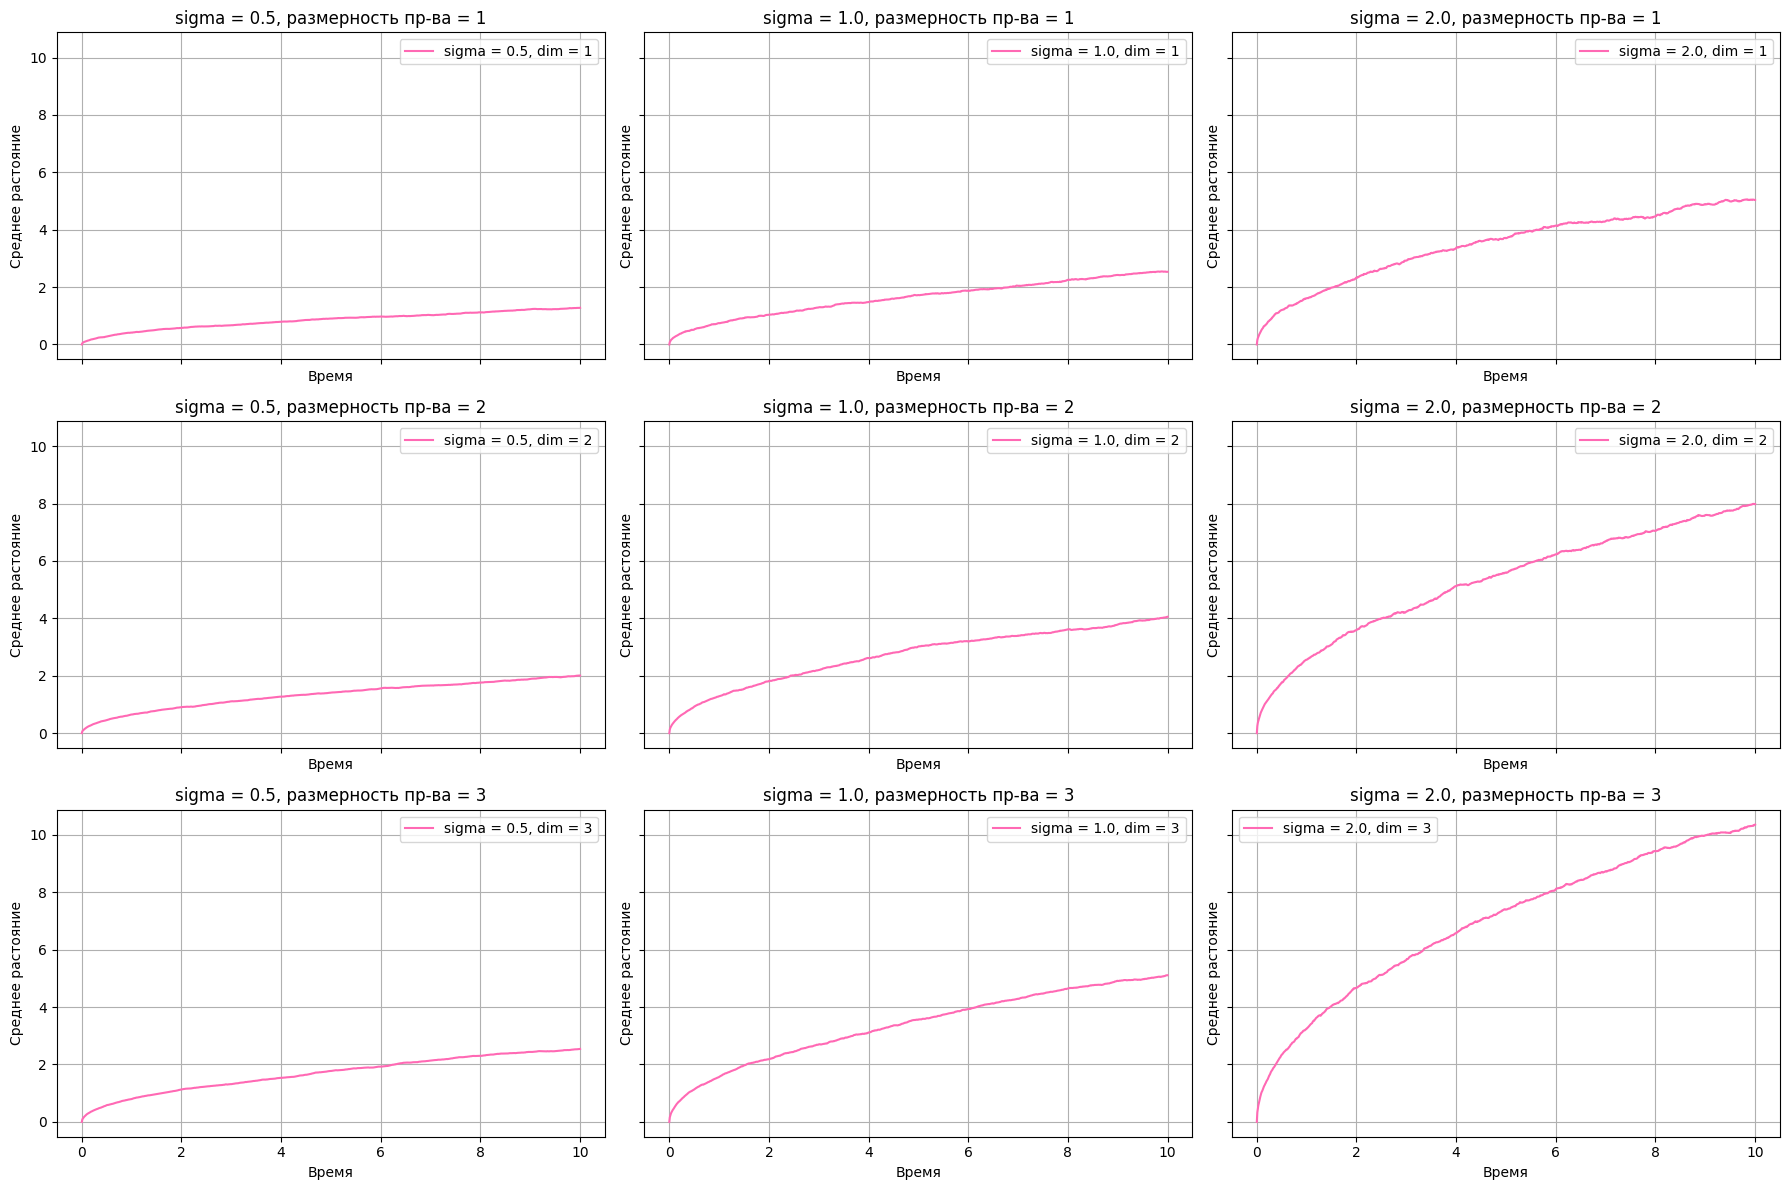

In [ ]:
def brownian_motion(sigma, T, num_intervals, dim, num_particles):
    delta_t = T / num_intervals

    increments = np.random.normal(scale=sigma * np.sqrt(delta_t), size=(num_particles, dim, num_intervals))

    trajectories = np.concatenate([
        np.zeros((num_particles, dim, 1)),
        np.cumsum(increments, axis=2)
    ], axis=2)

    return trajectories

def mean_distance_to_origin(sigma, T, num_intervals, dim, num_trajectories):

    delta_t = T / num_intervals
    trajectories = brownian_motion(sigma, T, num_intervals, dim, num_trajectories)

    distances = np.sqrt(np.sum(trajectories**2, axis=1))

    mean_distances = np.mean(distances, axis=0)
    return mean_distances

def plot_mean_distances(sigma_values, dims, T, num_intervals, num_trajectories):
    time_steps = np.linspace(0, T, num_intervals + 1)
    fig, axes = plt.subplots(len(dims), len(sigma_values), figsize=(18, 12), sharex=True, sharey=True)

    for i, dim in enumerate(dims):
        for j, sigma in enumerate(sigma_values):
            mean_distances = mean_distance_to_origin(sigma, T, num_intervals, dim, num_trajectories)
            ax = axes[i, j] if len(dims) > 1 else axes[j]

            ax.plot(time_steps, mean_distances, label=f"sigma = {sigma}, dim = {dim}", color = "hotpink")
            ax.set_title(f"sigma = {sigma}, размерность пр-ва = {dim}")
            ax.set_xlabel("Время")
            ax.set_ylabel("Среднее растояние")
            ax.legend()
            ax.grid(True)

    plt.tight_layout()
    plt.show()

sigma_values = [0.5, 1.0, 2.0]
dims = [1, 2, 3]
T = 10.0
num_intervals = 1000
num_trajectories = 500

plot_mean_distances(sigma_values, dims, T, num_intervals, num_trajectories)


###Методика исследования###
1. Сгенерируем множество траекторий для заданного значения σ, времени T, количества временных интервалов и размерности.
2. Для каждого временного шага вычислим среднее расстояние от начала координат.
3. Повторим исследование для разных значений σ и размерностей пространства.
4. Построим графики зависимости среднего расстояния от времени и σ.
***
###Выводы из исследования###
+ Зависимость от времени:
  Среднее расстояние частицы от начала координат увеличивается со временем.
+ Влияние параметра σ:
  С увеличением σ, скорость роста среднего расстояния от начала координат увеличивается. Это ожидаемо, поскольку σ определяет масштаб случайных приращений.
+ Зависимость от размерности (dim):

  При увеличении размерности пространства среднее расстояние также возрастает. Это связано с тем, что расстояние от начала координат пропорционально dim.

# Часть 2 `Pandas`, `Matplotlib`, `Seaborn`

## Задача 1  (2 балла)

Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [ ]:
coins = pd.read_csv('coins.csv')

Посмотрим что получилось

In [ ]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете?

In [ ]:
print(coins['name'].nunique())

70


#### 2. За какой период данные мы имеем?

In [ ]:
print(coins['date'].min(), end=" - ")
print(coins['date'].max())

2013-04-28 - 2018-06-06


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски?

In [ ]:
coins.isnull().sum()

,0
date,0
price,327
txCount,1520
txVolume,1830
activeAddresses,1520
symbol,0
name,0
open,0
high,0
low,0


#### 4. У какой монеты и когда была самая высокая цена?

In [ ]:
max_price_row = coins.loc[coins['price'].idxmax()]
print(f"Монета: {max_price_row['name']}")
print(f"Дата: {max_price_row['date']}")

Монета: Bitcoin
Дата: 2017-12-17


#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями.

KingN Coin


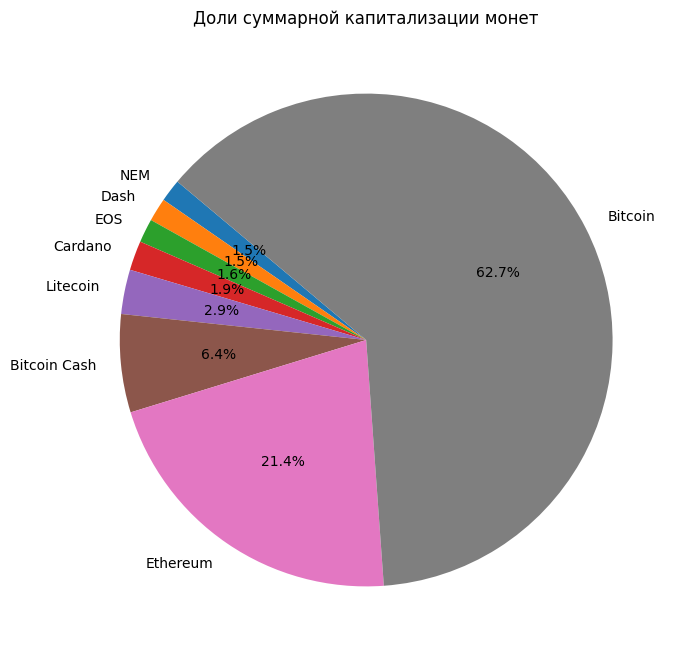

In [ ]:
total_market_cap = coins.groupby("name")["market"].sum().sort_values()
print(total_market_cap.idxmin())
plt.figure(figsize=(8, 8))
plt.pie(total_market_cap[-8:], autopct='%1.1f%%', labels=total_market_cap.index[-8:], startangle=140)
plt.title("Доли суммарной капитализации монет")
plt.show()

## 2. Визуализация (2 балла)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [ ]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    my_coin = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    fig, ax = plt.subplots(figsize=(12, 8))

    for _, row in my_coin.iterrows():
        color = '#CCFF33' if row['close'] >= row['open'] else 'hotpink'
        ax.plot([row['date'], row['date']], [row['low'], row['high']], color=color, linewidth=1)
        ax.plot([row['date'], row['date']], [row['open'], row['close']],
                color=color, linewidth=6)
    ax.set_title(f"Ценовая динамика {symbol} ({start_date} - {end_date})", fontsize=16)
    ax.set_xlabel("Дата", fontsize=12)
    ax.set_ylabel("Цена (USD)", fontsize=12)
    ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(interval=1))

    plt.xticks(rotation=90)
    plt.grid(visible=True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()



Посмотрим, что получилось:

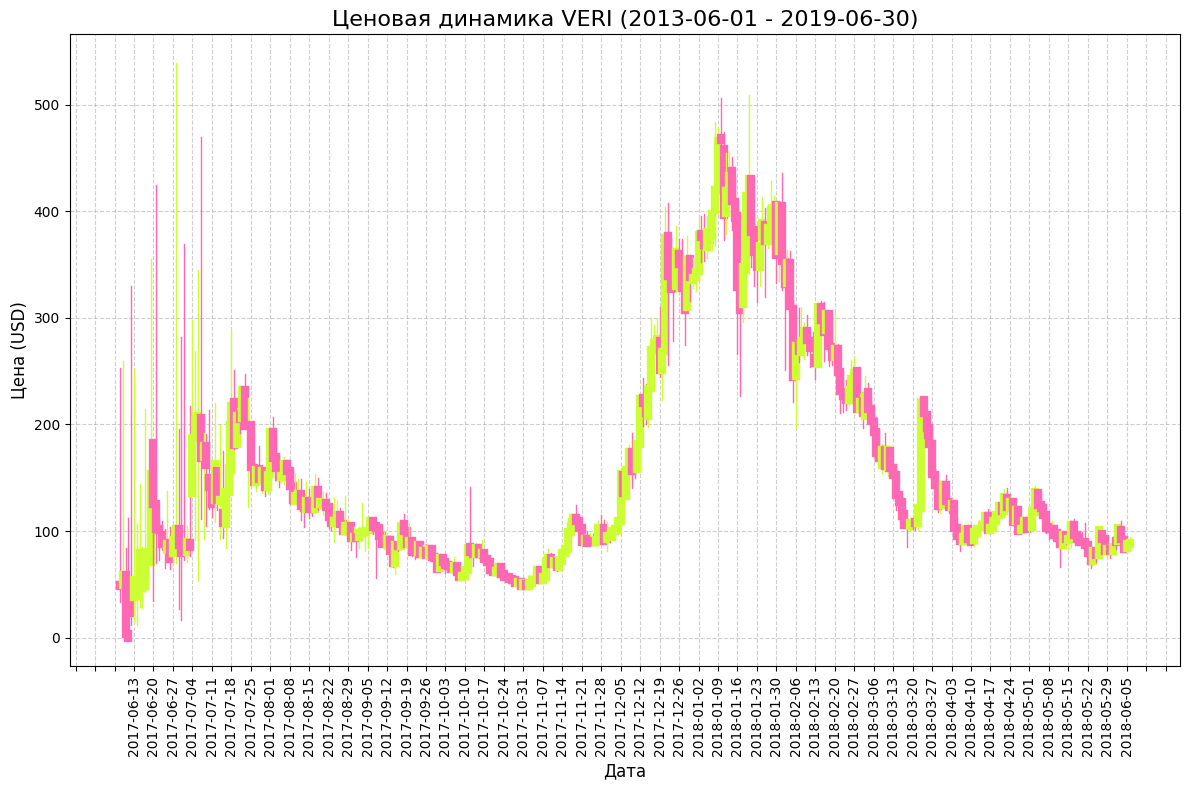

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (2 балла)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    my_coin = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    pnd_values = my_coin['high'] / my_coin[['open', 'close']].max(axis=1)
    max_pnd_day = pnd_values.max()
    return max_pnd_day

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

1.1428940004366206

#### Сравните эти значения для разных монет.

In [ ]:
max_name = ''
max = 0
min_name = ''
min = 1000

for coin in coins['symbol'].unique():
  current_coin_pnd = find_most_severe_pump_and_dump(coins, symbol=coin, start_date='2017-06-01', end_date='2018-06-01')
  if max < current_coin_pnd:
    max = current_coin_pnd
    max_name = coin
  if min > current_coin_pnd:
    min = current_coin_pnd
    min_name = coin
print(f"Самый большой pump'n'dump был у {max_name}: {max}")
print(f"Самый малелький pump'n'dump был у {min_name}: {min}")


Самый большой pump'n'dump был у VERI: 33.549253731343285
Самый малелький pump'n'dump был у USDT: 1.099009900990099


## 4. Окупаемость инвестиций (2 балла)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    filtered_coins = coins[(coins['symbol'].isin(investments)) &
                           ((coins['date'] == start_date) |
                            (coins['date'] == end_date))]
    in_sum = 0
    out_sum = 0
    for coin in investments.keys():
      pr = filtered_coins[(filtered_coins['date'] == start_date) &
                                (filtered_coins['symbol'] == coin)]['price'].squeeze()
      in_sum += pr * investments[coin]

    for coin in investments.keys():
      pr = filtered_coins[(filtered_coins['date'] == end_date) &
                                (filtered_coins['symbol'] == coin)]['price'].squeeze()
      out_sum += pr * investments[coin]


    return (out_sum - in_sum) / in_sum

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.004831614576721986

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.53575236064575